In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell

# Setting styles
InteractiveShell.ast_node_interactivity = "all"
sns.set(style="whitegrid", color_codes=True)


In [2]:

data_iphone = pd.read_csv(
    os.path.join("data", "external", "iphone_smallmatrix_labeled_8d.csv")
)
data_galaxy = pd.read_csv(
    os.path.join("data", "external", "galaxy_smallmatrix_labeled_8d.csv")
)


 # Basic Information about the data

In [3]:

print("iphone set size:", len(data_iphone))
print("galaxy set size:", len(data_galaxy))

data_iphone.head()
data_galaxy.head()

data_iphone.dtypes
print("missing values in iphone set:", sum(data_iphone.isnull().sum()))
print("missing values in galaxy set:", sum(data_galaxy.isnull().sum()))


iphone set size: 12973
galaxy set size: 12973
missing values in iphone set: 0
missing values in galaxy set: 0


,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,iphonesentiment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,iphone,samsunggalaxy,sonyxperia,nokialumina,htcphone,ios,googleandroid,iphonecampos,samsungcampos,sonycampos,...,sonyperunc,nokiaperunc,htcperunc,iosperpos,googleperpos,iosperneg,googleperneg,iosperunc,googleperunc,galaxysentiment
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


iphone             int64
samsunggalaxy      int64
sonyxperia         int64
nokialumina        int64
htcphone           int64
ios                int64
googleandroid      int64
iphonecampos       int64
samsungcampos      int64
sonycampos         int64
nokiacampos        int64
htccampos          int64
iphonecamneg       int64
samsungcamneg      int64
sonycamneg         int64
nokiacamneg        int64
htccamneg          int64
iphonecamunc       int64
samsungcamunc      int64
sonycamunc         int64
nokiacamunc        int64
htccamunc          int64
iphonedispos       int64
samsungdispos      int64
sonydispos         int64
nokiadispos        int64
htcdispos          int64
iphonedisneg       int64
samsungdisneg      int64
sonydisneg         int64
nokiadisneg        int64
htcdisneg          int64
iphonedisunc       int64
samsungdisunc      int64
sonydisunc         int64
nokiadisunc        int64
htcdisunc          int64
iphoneperpos       int64
samsungperpos      int64
sonyperpos         int64


 # Checking if Datasets are the Same

 * The dataset only differ from the target variable (sentiment towards IPhone or Samsung Galaxy)

In [4]:

print(
    "Are datasets identical except for the last column?",
    data_iphone.drop(columns="iphonesentiment").equals(
        data_galaxy.drop(columns="galaxysentiment")
    ),
)


Are datasets identical except for the last column? True


 # Value Distributions for the Targets

 * Target variables have very uneven distributions with both the lowest and the
 and highest values having a disportionate share
   * It might be a good to try to split the values into neutral, positive and negative

Text(0.5, 1.0, 'IPhone Sentiment Distribution')

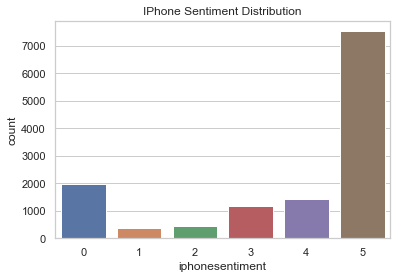

Text(0.5, 1.0, 'Galaxy Sentiment Distribution')

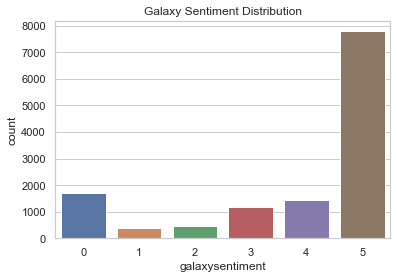

In [5]:

sns.countplot(x="iphonesentiment", data=data_iphone)
plt.title("IPhone Sentiment Distribution")
plt.show()

sns.countplot(x="galaxysentiment", data=data_galaxy)
plt.title("Galaxy Sentiment Distribution")
plt.show()


 # Value distributions for Sites with no Mention of the Phone
 * Same as before, but keeping only the websites where there are mentions of the phone
 * Sites that don't mention Galaxy have more sentiments than sites that do! Opposite is true
 for the IPhone
 * There might be some error in the coding or then I'm misunderstanding the columns

Text(0.5, 1.0, 'IPhone Sentiment Distribution (Iphone mentioned)')

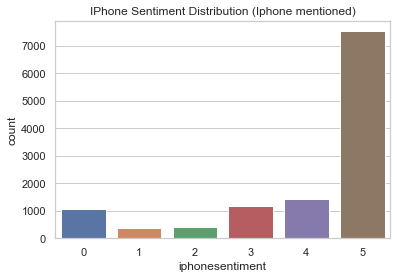

Text(0.5, 1.0, 'Galaxy Sentiment Distribution (Galaxy mentioned)')

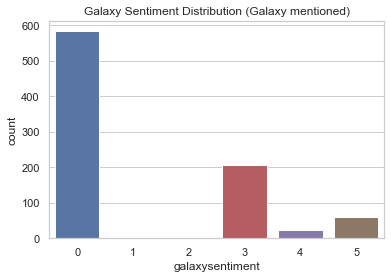

Text(0.5, 1.0, 'IPhone Sentiment Distribution (Iphone not mentioned)')

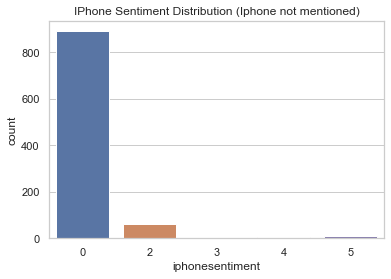

Text(0.5, 1.0, 'Galaxy Sentiment Distribution (Galaxy not mentioned)')

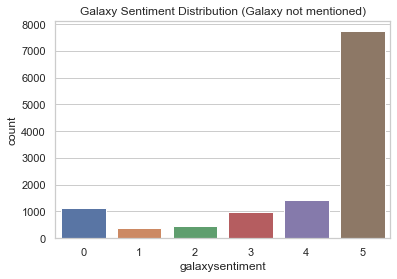

In [6]:

sns.countplot(x="iphonesentiment", data=data_iphone[data_iphone.iphone > 0])
plt.title("IPhone Sentiment Distribution (Iphone mentioned)")
plt.show()

sns.countplot(x="galaxysentiment", data=data_galaxy[data_galaxy.samsunggalaxy > 0])
plt.title("Galaxy Sentiment Distribution (Galaxy mentioned)")
plt.show()

sns.countplot(x="iphonesentiment", data=data_iphone[data_iphone.iphone == 0])
plt.title("IPhone Sentiment Distribution (Iphone not mentioned)")
plt.show()

sns.countplot(x="galaxysentiment", data=data_galaxy[data_galaxy.samsunggalaxy == 0])
plt.title("Galaxy Sentiment Distribution (Galaxy not mentioned)")
plt.show()


 # Are the Sentiments Identical?
 * Sentiment for the both phones is almost the same if you look at all the websites
 * Sites that mention both phones have usually different sentiments, as do sites
 that mention neither of the phones
 * This looks legit unlike the previous findings about the distribution of the values

In [7]:

print(
    "Percent of sites with identical sentiment to both phones:",
    round(
        sum(data_galaxy.galaxysentiment == data_iphone.iphonesentiment)
        * 100
        / len(data_galaxy),
        1,
    ),
    "%",
)


both_phones_mask = (data_galaxy.samsunggalaxy > 0) & (data_iphone.iphone > 0)

print(
    "Percent of sites with identical sentiment to both phones when both phones mentioned:",
    round(
        sum(
            data_galaxy[both_phones_mask].galaxysentiment
            == data_iphone[both_phones_mask].iphonesentiment
        )
        * 100
        / len(data_galaxy),
        1,
    ),
    "%",
)

neither_phone_mask = (data_galaxy.samsunggalaxy == 0) & (data_iphone.iphone == 0)

print(
    "Percent of sites with identical sentiment to both phones when neither of the phones mentioned:",
    round(
        sum(
            data_galaxy[neither_phone_mask].galaxysentiment
            == data_iphone[neither_phone_mask].iphonesentiment
        )
        * 100
        / len(data_galaxy),
        1,
    ),
    "%",
)


Percent of sites with identical sentiment to both phones: 90.0 %
Percent of sites with identical sentiment to both phones when both phones mentioned: 4.6 %
Percent of sites with identical sentiment to both phones when neither of the phones mentioned: 5.5 %


 # Distribution of the Features

 * Feature columns don't follow a Gaussian distribution and have outliers
   * Use RobustScaler instead of StandardScaler
 * Some feature columns have no variance. These should be removed before going further

Text(0.5, 1.0, 'iphone')

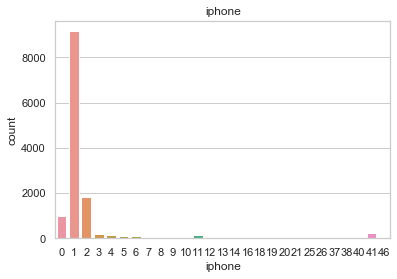

Text(0.5, 1.0, 'samsunggalaxy')

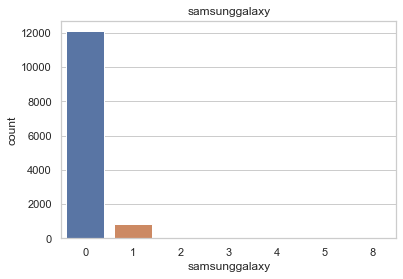

Text(0.5, 1.0, 'sonyxperia')

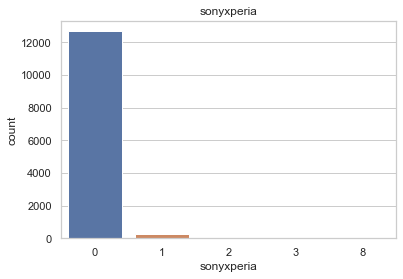

Text(0.5, 1.0, 'nokialumina')

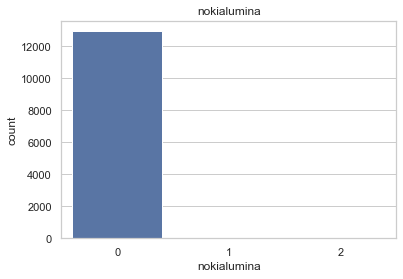

Text(0.5, 1.0, 'htcphone')

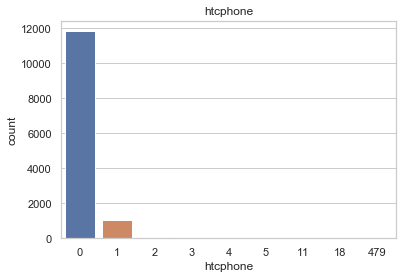

Text(0.5, 1.0, 'ios')

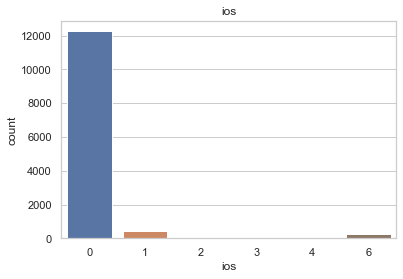

Text(0.5, 1.0, 'googleandroid')

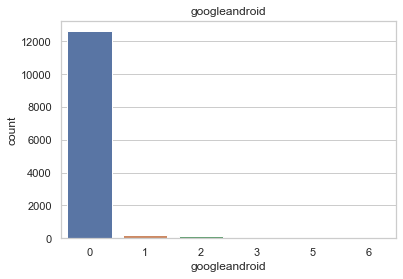

Text(0.5, 1.0, 'iphonecampos')

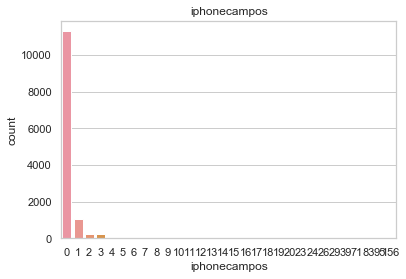

Text(0.5, 1.0, 'samsungcampos')

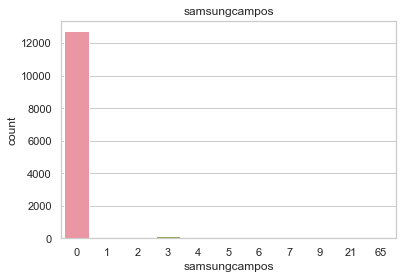

Text(0.5, 1.0, 'sonycampos')

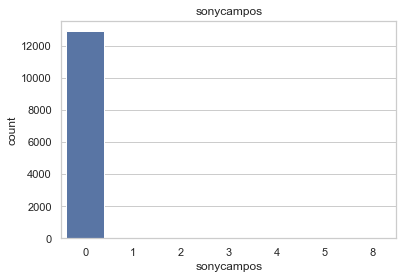

Text(0.5, 1.0, 'nokiacampos')

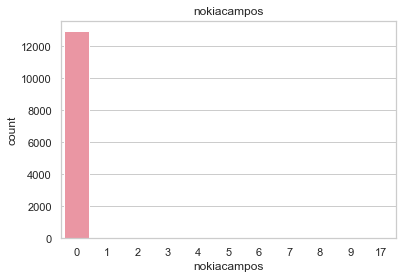

Text(0.5, 1.0, 'htccampos')

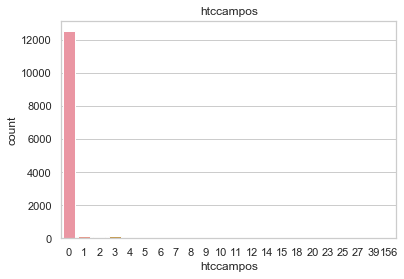

Text(0.5, 1.0, 'iphonecamneg')

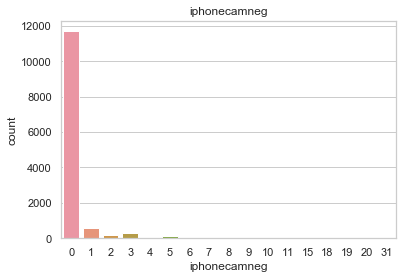

Text(0.5, 1.0, 'samsungcamneg')

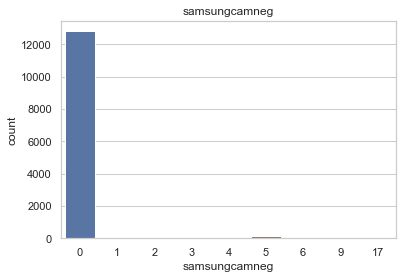

Text(0.5, 1.0, 'sonycamneg')

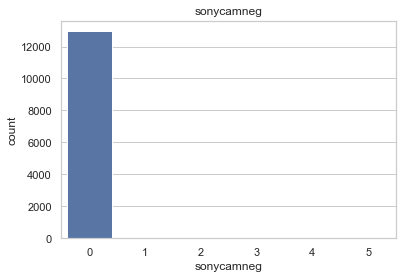

Text(0.5, 1.0, 'nokiacamneg')

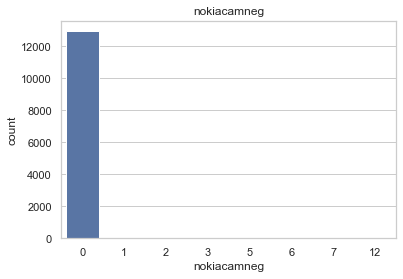

Text(0.5, 1.0, 'htccamneg')

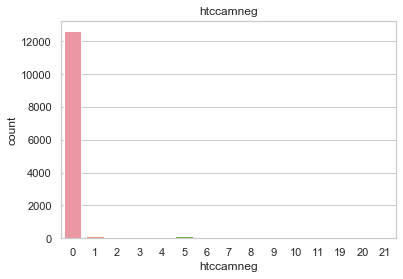

Text(0.5, 1.0, 'iphonecamunc')

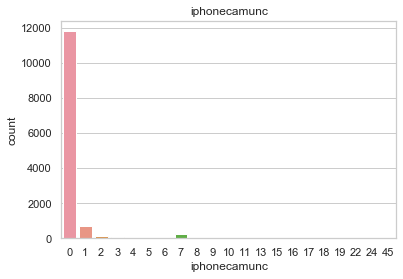

Text(0.5, 1.0, 'samsungcamunc')

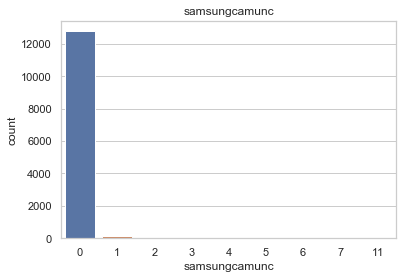

Text(0.5, 1.0, 'sonycamunc')

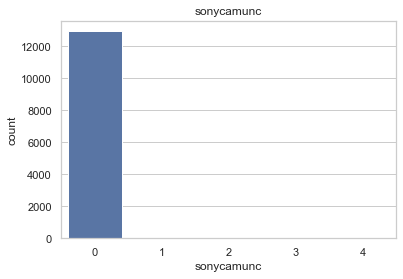

Text(0.5, 1.0, 'nokiacamunc')

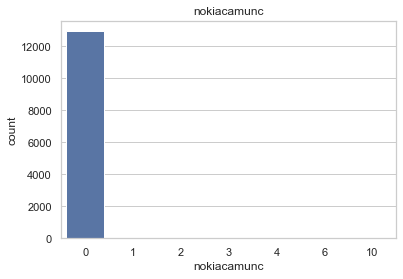

Text(0.5, 1.0, 'htccamunc')

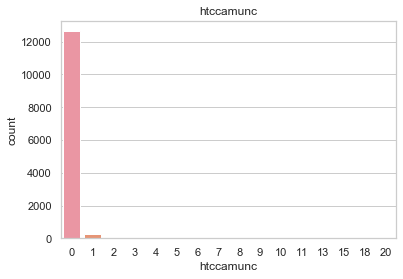

Text(0.5, 1.0, 'iphonedispos')

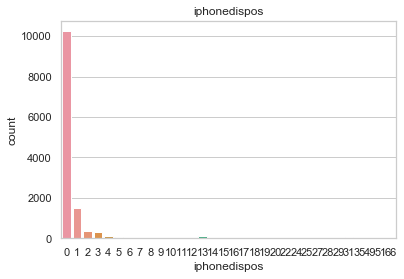

Text(0.5, 1.0, 'samsungdispos')

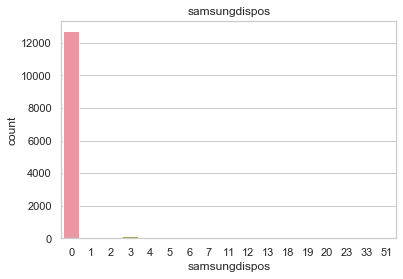

Text(0.5, 1.0, 'sonydispos')

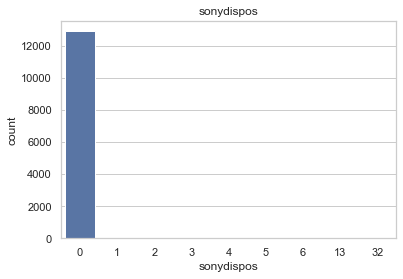

Text(0.5, 1.0, 'nokiadispos')

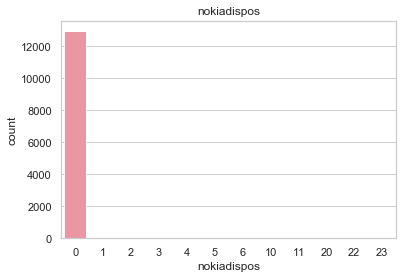

Text(0.5, 1.0, 'htcdispos')

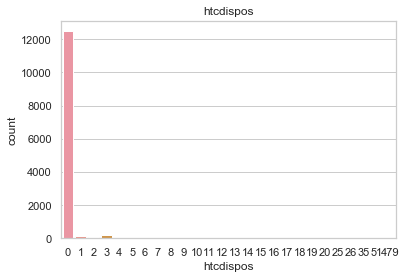

Text(0.5, 1.0, 'iphonedisneg')

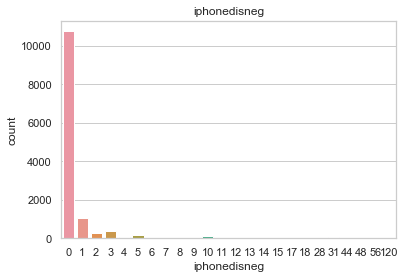

Text(0.5, 1.0, 'samsungdisneg')

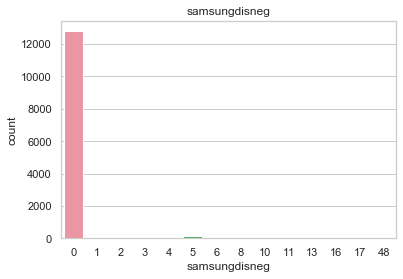

Text(0.5, 1.0, 'sonydisneg')

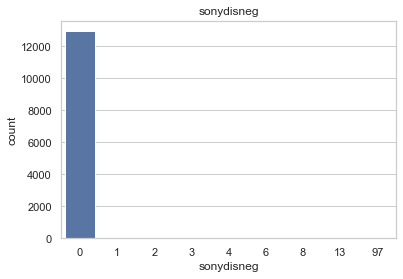

Text(0.5, 1.0, 'nokiadisneg')

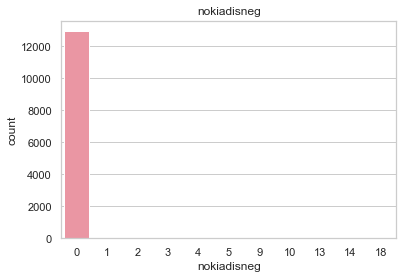

Text(0.5, 1.0, 'htcdisneg')

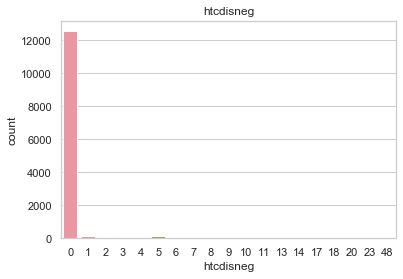

Text(0.5, 1.0, 'iphonedisunc')

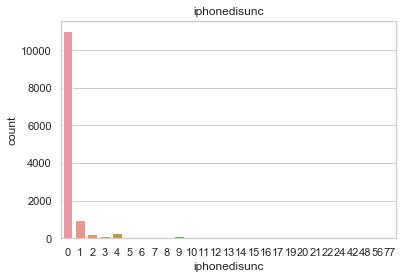

Text(0.5, 1.0, 'samsungdisunc')

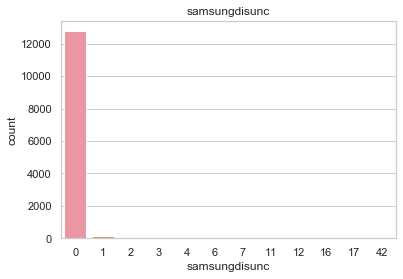

Text(0.5, 1.0, 'sonydisunc')

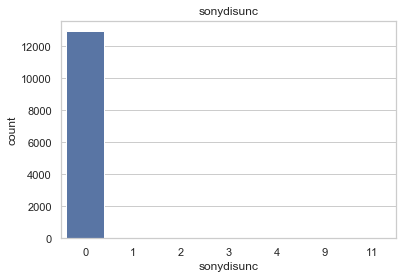

Text(0.5, 1.0, 'nokiadisunc')

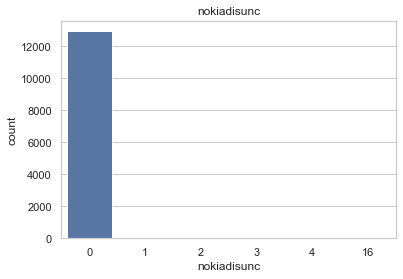

Text(0.5, 1.0, 'htcdisunc')

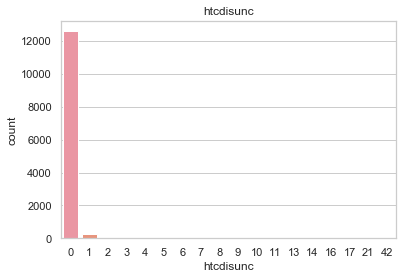

Text(0.5, 1.0, 'iphoneperpos')

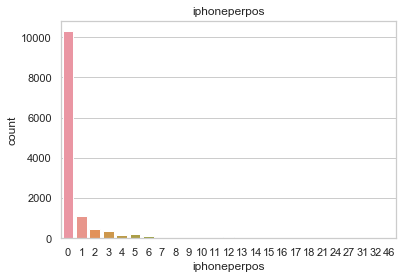

Text(0.5, 1.0, 'samsungperpos')

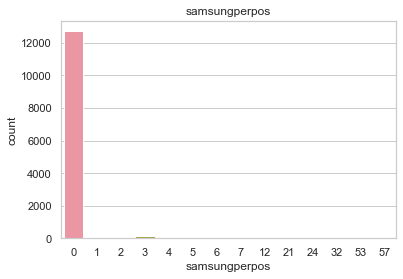

Text(0.5, 1.0, 'sonyperpos')

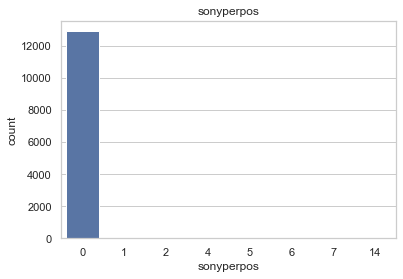

Text(0.5, 1.0, 'nokiaperpos')

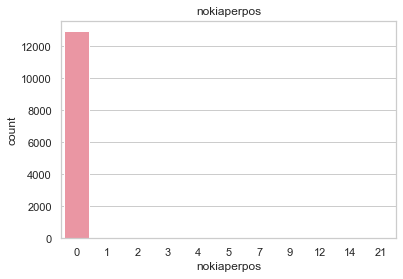

Text(0.5, 1.0, 'htcperpos')

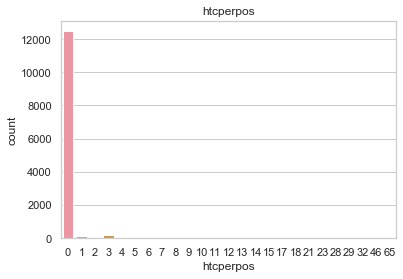

Text(0.5, 1.0, 'iphoneperneg')

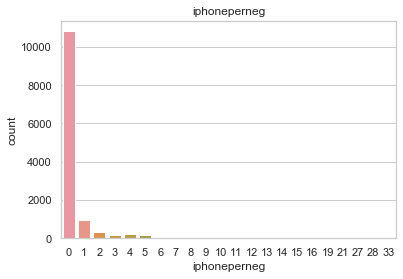

Text(0.5, 1.0, 'samsungperneg')

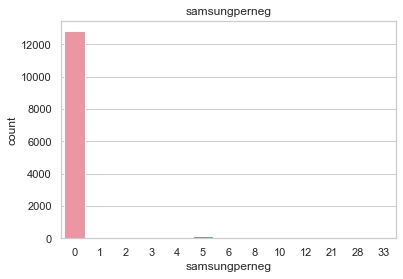

Text(0.5, 1.0, 'sonyperneg')

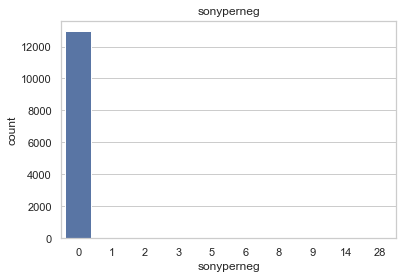

Text(0.5, 1.0, 'nokiaperneg')

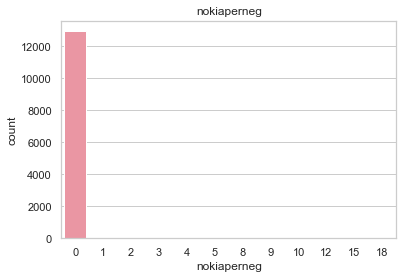

Text(0.5, 1.0, 'htcperneg')

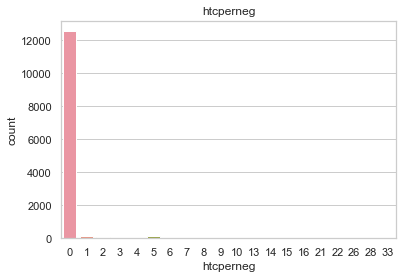

Text(0.5, 1.0, 'iphoneperunc')

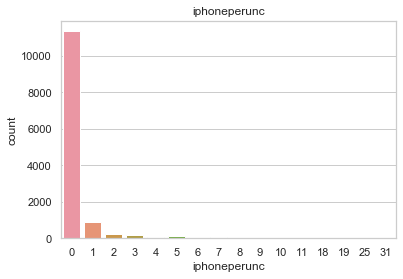

Text(0.5, 1.0, 'samsungperunc')

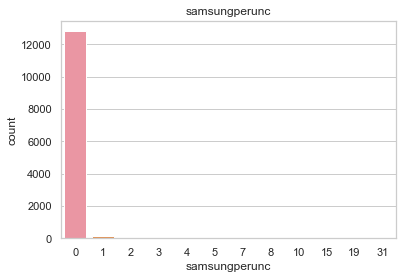

Text(0.5, 1.0, 'sonyperunc')

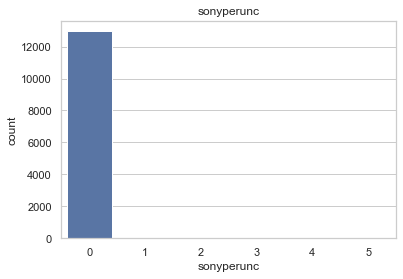

Text(0.5, 1.0, 'nokiaperunc')

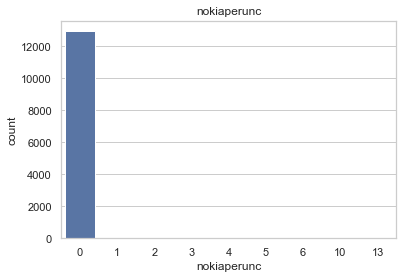

Text(0.5, 1.0, 'htcperunc')

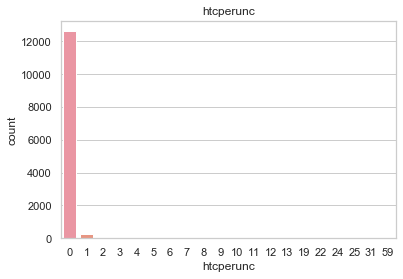

Text(0.5, 1.0, 'iosperpos')

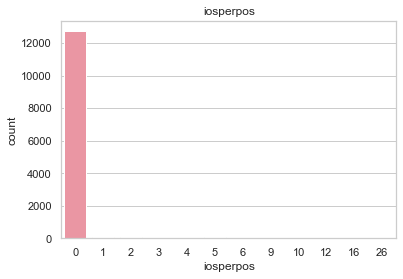

Text(0.5, 1.0, 'googleperpos')

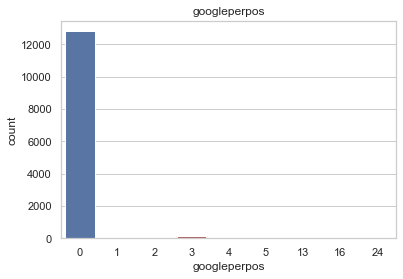

Text(0.5, 1.0, 'iosperneg')

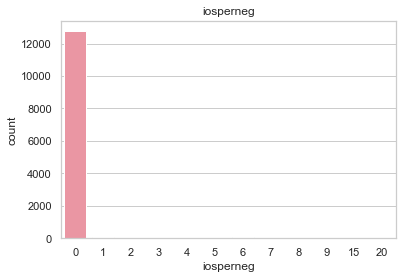

Text(0.5, 1.0, 'googleperneg')

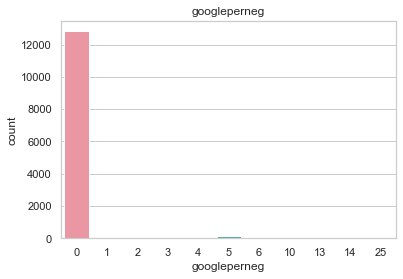

Text(0.5, 1.0, 'iosperunc')

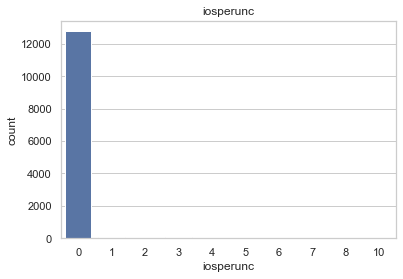

Text(0.5, 1.0, 'googleperunc')

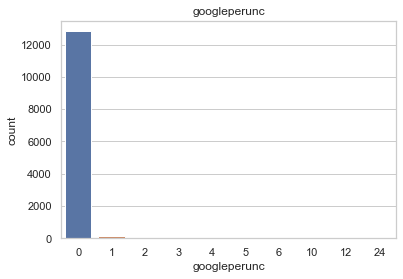

In [8]:

feature_columns = data_galaxy.columns[:-1]

for column in feature_columns:
    sns.countplot(x=column, data=data_galaxy)
    plt.title(column)
    plt.show()


 # Correlation Between the Variables

 * Correlations are normally low and positive
 * Distinctive click that only correlate with each other
 (htcphone + htcdispos, iosperpos, iosperneg)
 * Correlations to the target values are all small and mostly negative

Text(0.5, 1, 'Correlations for IPhone Dataset')

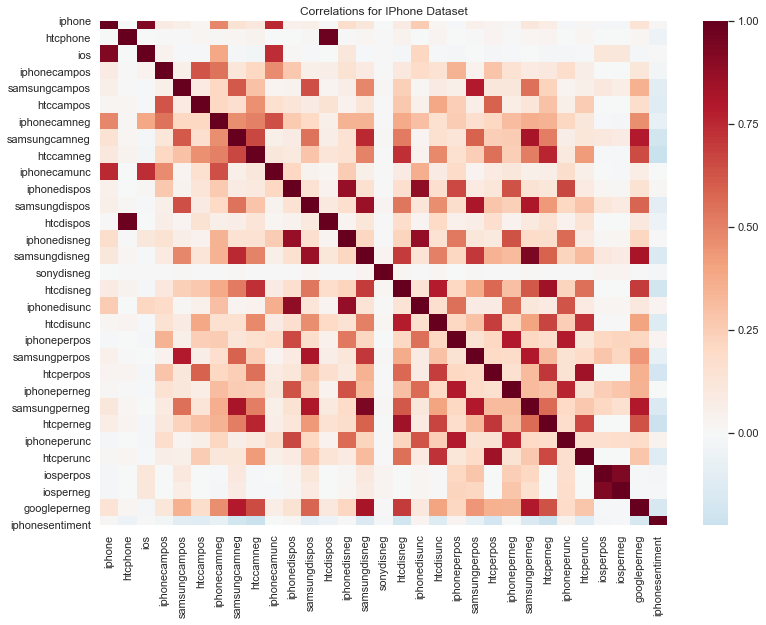

Text(0.5, 1, 'Correlations for Galaxy Dataset')

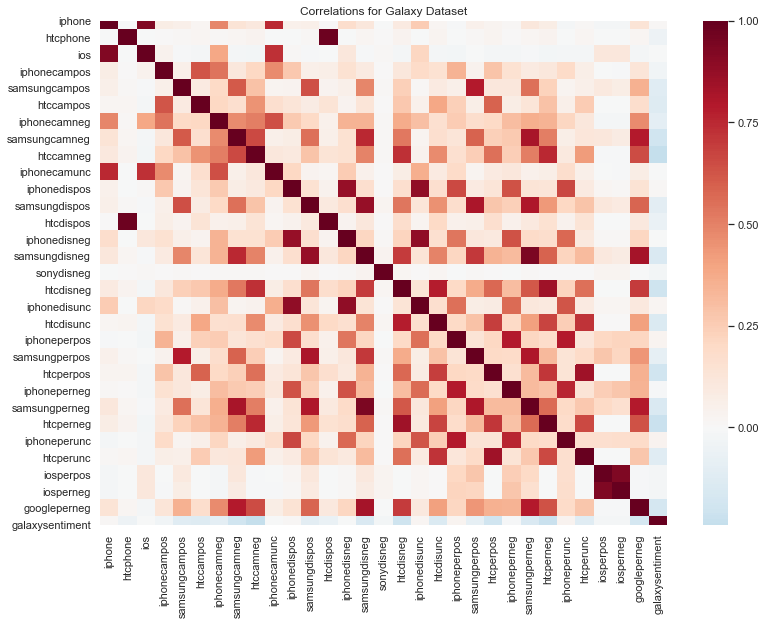

In [9]:

# Dropping columns with very low variance as we have so many variables
data_galaxy = data_galaxy.loc[:, data_galaxy.std() > 0.5]
data_iphone = data_iphone.loc[:, data_iphone.std() > 0.5]

corr_iphone = data_iphone.corr()
corr_galaxy = data_galaxy.corr()

sns.set(rc={"figure.figsize": (12.7, 9.27)})

sns.heatmap(corr_iphone, cmap="RdBu_r", center=0)
plt.title("Correlations for IPhone Dataset")
plt.show()

sns.heatmap(corr_galaxy, cmap="RdBu_r", center=0)
plt.title("Correlations for Galaxy Dataset")
plt.show()

